In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d import art3d

plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace,array,arange,meshgrid

from scipy.integrate import quad,dblquad

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$

# One-minute Review

Compute the following line integral. 
 $$\int_C \left(x y e^{-x y}-e^{-x y}\right)\,dx + x^2 e^{-x y}\,dy$$ where $C$ is oriented curve below. 

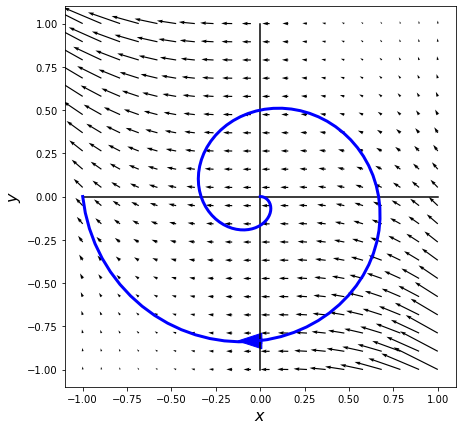

In [3]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x*y*exp(-x*y)-exp(-x*y),exp(-x*y)*x**2);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.arrow(0.01,-.835,-.001,0,width=.03,color='b')
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
plt.plot((1-t)*cos(t*6*pi/2-pi),(1-t)*sin(t*6*pi/2-pi),'b',lw=3);

As you might guess because there is no obvious parametrization for that curve, this is a conservative vector field with potential $$f(x,y) = -x e^{-xy}$$

So the integral is simply $f(-1,0) - f(0,0) = 1$.

In [7]:
# let's check the hard way.

F = lambda x,y: (x*y*exp(-x*y)-exp(-x*y),exp(-x*y)*x**2)

quad(lambda t: np.dot(F(t*cos(t)/(3*pi),-t*sin(t)/(3*pi)),(cos(t)/(3*pi) - t*sin(t)/(3*pi),-sin(t)/(3*pi) - t*cos(t)/(3*pi))),0,3*pi)

(0.9999999999999996, 7.487341837710568e-09)

# Green's Theorem

$$\oint_{\partial D} P\,dx + Q\,dy = \iint_\mathcal{D} \left(\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right)\,dA$$ 

where: 

  - $D$ is a (simply connected) region in the plane,

  - $\partial D$ is an counterclockwise-oriented, simple, closed curve forming the boundary of $\mathcal D$, and

  - $\vec F(x,y) =  \langle P(x,y),Q(x,y) \rangle$ is a continuously differentiable vector field. 

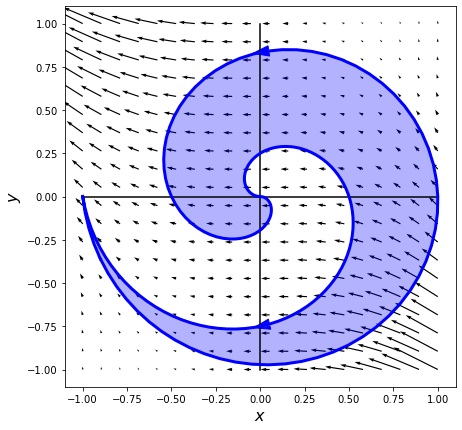

In [41]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x*y*exp(-x*y)-exp(-x*y),exp(-x*y)*x**2);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
xs = np.concatenate(((1-t)*cos(t*4*pi/2-pi),(1+2/3*sin(pi*t)**2)*(t)*cos((1-t)*6*pi/2-pi)))
ys = np.concatenate(((1-t)*sin(t*4*pi/2-pi),(1+2/3*sin(pi*t)**2)*(t)*sin((1-t)*6*pi/2-pi)))
for ti in (25,150):
    plt.arrow(xs[ti],ys[ti],-(xs[ti+1]-xs[ti-1])/2,-(ys[ti+1]-ys[ti-1])/2,width=.02,color='b',length_includes_head=True)
plt.fill(xs,ys,'b',lw=3,alpha=.3);
plt.plot(xs,ys,'b',lw=3,alpha=1);

# plt.plot((1-t)*cos(t*4*pi/2-pi),(1-t)*sin(t*4*pi/2-pi),'b',lw=3);
# plt.plot((1-t)*cos(t*6*pi/2-pi),(1-t)*sin(t*6*pi/2-pi),'b',lw=3);

# Examples

  1. Compute the line integral of $\vec F(x,y) =\langle (xy - y^2) , x^2\rangle$ on the triangular curve connecting $(0,0)$, $(2,0)$, and $(3,2)$ counterclockwise.

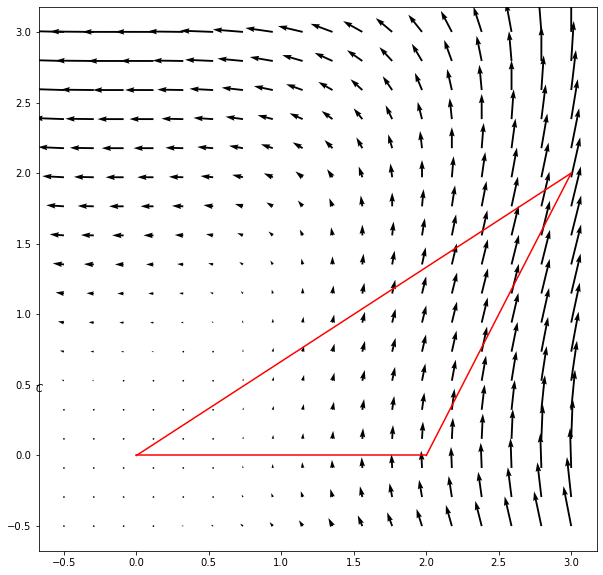

In [34]:
r1 = lambda t: np.array([2*t,0*t])
r2 = lambda t: np.array([2 + t, 2*t])
r3 = lambda t: np.array([3*t,2*t])
t = np.linspace(0,1,100)
plt.plot(*r1(t),'-r')
plt.plot(*r2(t),'-r')
plt.plot(*r3(t),'-r')
plt.text(-.7,.45,"$C$");
u = np.linspace(-1/2,3,18) 
v = np.linspace(-1/2,3,18)
x,y = np.meshgrid(u,v)
plt.quiver(x,y,y*x -y**2,x**2);


$$ \int_C \vec F\cdot d\vec r  = \int_0^2 \int_{3/2 y}^{2+ y/2} (2x - (x - 2y)) dx \,dy$$

To compute around the curve, we parameterize each leg. Call the bottom $C_1$, the right $C_2$, and the top $C_3$. 

$\displaystyle C_1: \vec r(t) = \langle t,0 \rangle$ for $0\leq t \leq 2$

$\displaystyle C_2: \vec r(t) = \langle 2 + t,2t \rangle$ for $0\leq t \leq 1$

$\displaystyle C_1: \vec r(t) = \langle 3 - 3t,2 - 2t \rangle$ for $0\leq t \leq 1$

Then compute each line integral $\int_a^b \vec F(\vec r(t))\cdot \vec r'(t)\,dt$ and add them up. 

$$\int_0^2 \vec F(t,0)\cdot \langle 1,0 \rangle dt + \int_0^1 \vec F(2 + t,2t)\cdot \langle 1,2 \rangle dt + \int_0^1 \vec F(3-3t,2-2t)\cdot \langle -3,-2 \rangle dt $$

Computed numerically, we get $6$ for both.

In [57]:
dblquad(lambda x,y: x + 2*y,0,2,lambda y:3/2*y,lambda y:2 + y/2)[0]

6.0

In [56]:
def F(x,y):
    return (x*y - y**2,x**2)

I1 = quad(lambda t: np.dot(F(t,0),(1,0)),0,2)[0]
I2 = quad(lambda t: np.dot(F(2 + t,2*t),(1,2)),0,1)[0]
I3 = quad(lambda t: np.dot(F(3 - 3*t,2 - 2*t),(-3,-2)),0,1)[0]

I1 + I2 + I3

6.0

### Area

Question: Can you find the surface area of Central Park's Jackie Onassis Reservoir if you cannot swim?

Area: Sure. Ine just needs a GPS watch. 

Consider $C$ the ccw boundary of a region $\mathcal D$. then 

$$\oint_C x\, dy = \iint_\mathcal D 1\,dA = \text{Area}(\mathcal D) $$

![A picture of the Central Park reservoir with vector field overlay](reservoir.png)

### Area

Equivalently,

$$\text{Area}(\mathcal D) = \oint_{\partial \mathcal D} (-y)\,dx = \frac12 \oint_{\partial\mathcal D}x\,dy  -y\,dx $$

## Example

Let $\mathcal{R}$ be the rectangular region $[a,b]\times [c,d]$. Let $C$ be its counter-clockwise oriented boundary. Compute 

$$\oint_C \langle  0,x\rangle \cdot d\vec r$$

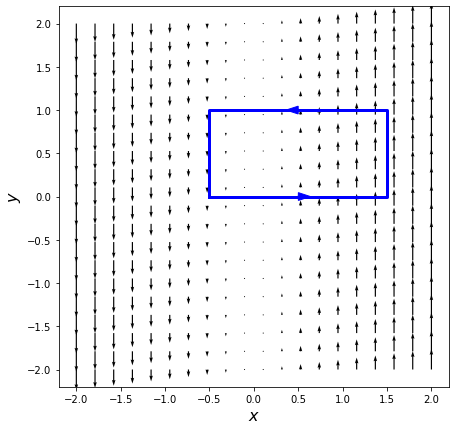

In [7]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,0,x);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
plt.plot([-1/2,3/2,3/2,-1/2,-1/2],[0,0,1,1,0],'b',lw=3);
plt.arrow(1/2,0,.001,0,color='b',width=.03)
plt.arrow(1/2,1,-.001,0,color='b',width=.03);

Of course, directly or by using Green's, we get $(b-a)(d-c)$, width times height.

# Notes on a Theorem

#### When do the FTLI and Green's Theorem both apply?


$$\int_C \vec F\cdot d\vec r$$

  - $F$ is conservative.

  - $C$ is closed. 

#### Hole-y Domains

The "simply connected part of Green's is easily relaxed if we consider an "oriented boundary" properly.

![Domain with a hole traversed in two pieces](holey.png)

#### Hole-y Domains

The "simply connected part of Green's is easily relaxed if we consider an "oriented boundary" properly.

![Domain with a hole - boundary traversed in two pieces](holey2.png)

### Exercise

Let $C$ be the curve tracing the boundary of the unit square (corners at $(0,0)$, $(1,0)$, $(1,1)$, and $(0,1)$) oriented counterclockwise. 

Let $ \vec F(x,y) = \langle 3, -  \frac{x^2}{2}\rangle$. Compute $\displaystyle \oint_C \vec F\cdot d\vec r$. 

Which is faster? Direct computation or using Green's Theorem?

Either way, you should get $-\frac12$.

#### What in the world is $\left(\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right)$?


##### Reminder

The **average value** of an integrable function $f(x,y)$ over a region $\mathcal D$ is given by 

$$f_\text{avg} (\mathcal D) = \frac{1}{\text{Area}(\mathcal D)} \iint_\mathcal D f\, dA. $$

If $f$ is continuous at $(a,b)$ and $\mathcal D_r$ is the disk around $(a,b)$ of radius $r$, then we know 

$$f(a,b) = \lim_{r\to 0^+} f_\text{avg}(\mathcal D_r).$$

In other words, a continuous function is locally equal to its average. 

In [43]:
@interact
def _(R=(0.,1.,.05),angle=(-6,96,6)):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    p = Circle((0,0),R,color='r',alpha=.4)
    ax.add_patch(p)
    art3d.patch_2d_to_3d(p,z=0,zdir="z")
    X,Y = np.meshgrid(np.linspace(-1,1,50),np.linspace(-1,1,50))
    ax.plot_surface(X,Y,X**2 - exp(Y) + 2,alpha = .5)
    r,t = np.meshgrid(np.linspace(0,R,50),np.linspace(0,2*pi,50))
    X = r*cos(t)
    Y = r*sin(t)
    ax.plot_surface(X,Y,X**2 - exp(Y) + 2)
    ax.view_init(30,angle)
    ax.set_zlim([0,3]);

interactive(children=(FloatSlider(value=0.5, description='R', max=1.0, step=0.05), IntSlider(value=42, descrip…

### Scalar Curl

Now let $\vec F(x,y) = P(x,y) \,\vec i + Q(x,y) \,\vec j$ and let

$$ C(x,y) = \left(\frac{\partial Q}{\partial x}(x,y) - \frac{\partial P}{\partial y}(x,y) \right)$$

Then this quantity is called the **scalar curl** of $\vec F$. 

To see why:

$$C(a,b) = \lim_{r\to 0^+} C_\text{avg}(\mathcal D_r).$$


$$ = \lim_{r\to 0^+}\frac{1}{\text{Area}(\mathcal D)} \iint_{\mathcal{D}_r} \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \, dA.$$

$$ = \lim_{r\to 0^+}\frac{\oint_{\partial\mathcal{D}_r} \vec F\cdot d\vec r}{\text{Area}(\mathcal D_r)} .$$

which is a rate of "circulation per unit area".

## Circulation v. flux

$$ \int_C \vec F\cdot d\vec r \qquad \text{vs.}\qquad \int_C \vec F\cdot d\vec n $$